In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
churn = pd.read_csv('Churn_Modelling.csv')

In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h2>Data preprocessing</h2>

In [305]:
churn = churn.drop(columns = ['RowNumber','Surname'])

In [43]:
churn.head(1)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [306]:
deploy = churn.copy()

In [44]:
churn['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [307]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
churn['Geography'] = le.fit_transform(churn['Geography'])
churn['Gender'] = le.fit_transform(churn['Gender'])

In [308]:
churn['Geography'].value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [47]:
churn['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [48]:
churn['Gender'].value_counts()

,count
Gender,
1,5457
0,4543


<h2>Data Analysis</h2>

In [49]:
churn.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<h3>1 . Credit Score</h3>

In [50]:
print(churn[churn['CreditScore'] == 350].value_counts().sum())
print(churn[churn['CreditScore'] == 850].value_counts().sum())

5
233


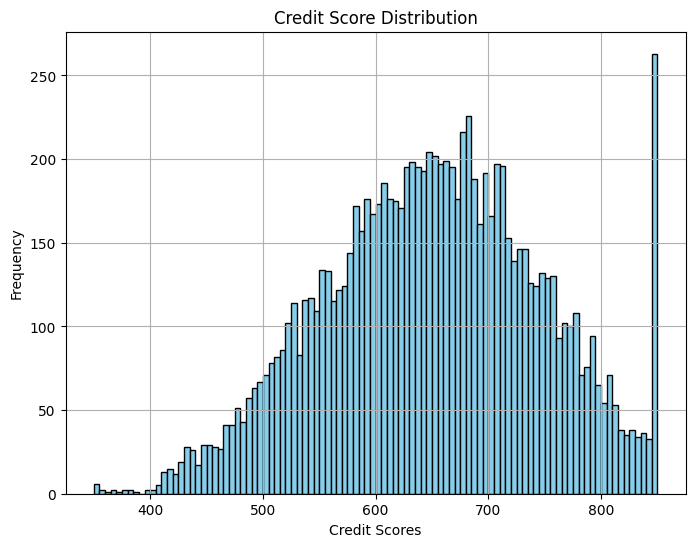

In [51]:
plt.figure(figsize = (8,6))
plt.hist(churn['CreditScore'] ,bins = 100, color = 'skyblue', edgecolor = 'black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

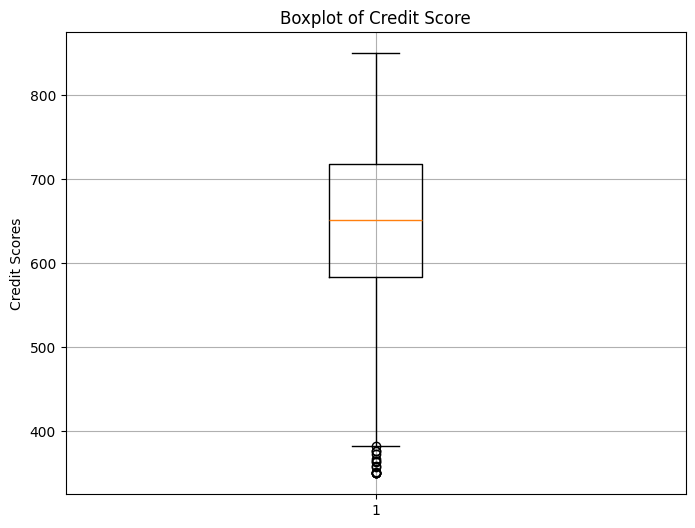

In [52]:
plt.figure(figsize = (8,6))
plt.boxplot(churn['CreditScore'])
plt.title('Boxplot of Credit Score')
plt.ylabel('Credit Scores')
plt.grid(True)
plt.show()

In [53]:
churn[churn['CreditScore'] < churn['CreditScore'].quantile(0.25) - 1.5*(churn['CreditScore'].quantile(0.75) - churn['CreditScore'].quantile(0.25))].value_counts().sum()

np.int64(15)

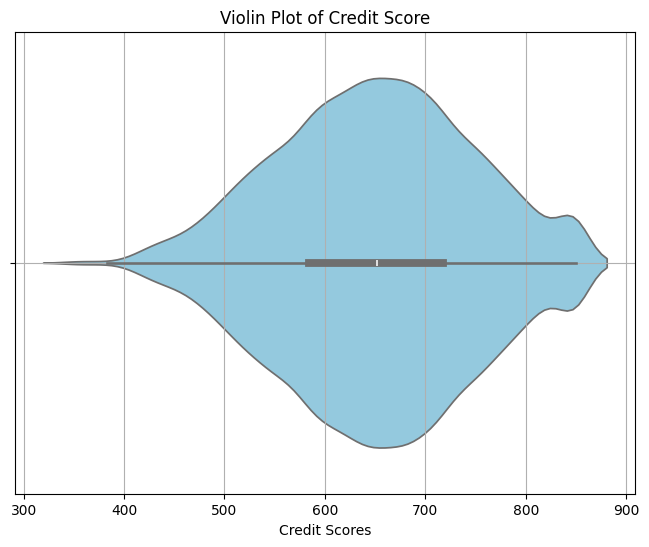

In [54]:
plt.figure(figsize = (8,6))
sns.violinplot(x = churn['CreditScore'], color = 'skyblue')
plt.title('Violin Plot of Credit Score')
plt.xlabel('Credit Scores')
plt.grid(True)
plt.show()

<h3>2. Geography</h3>

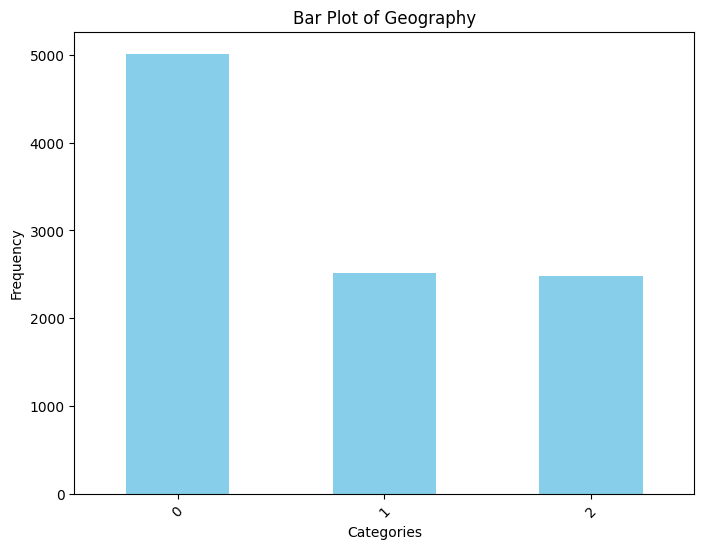

In [55]:
plt.figure(figsize = (8,6))
churn['Geography'].value_counts().plot(kind = 'bar',color = 'skyblue')
plt.title('Bar Plot of Geography')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

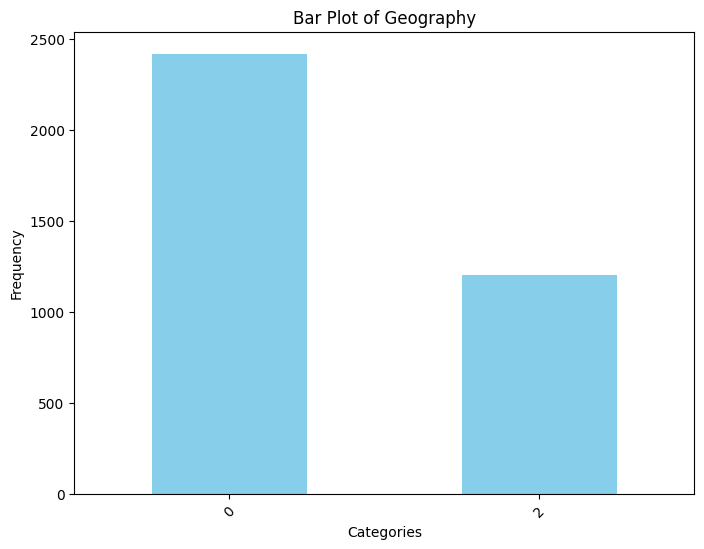

In [56]:
data = churn[churn['Balance'] == 0]
plt.figure(figsize = (8,6))
data['Geography'].value_counts().plot(kind = 'bar' , color = 'skyblue')
plt.title('Bar Plot of Geography')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

People with balance 0 are majorily from france and spain

<h3>3. Gender</h3>

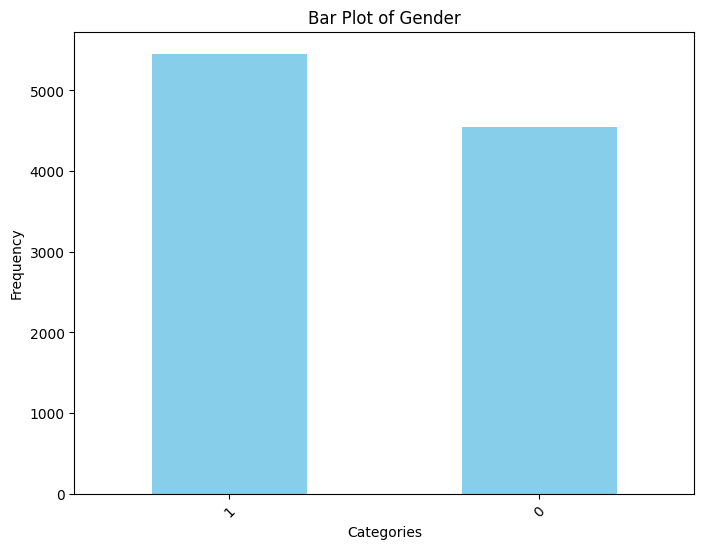

In [57]:
plt.figure(figsize=(8, 6))
churn['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Gender')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

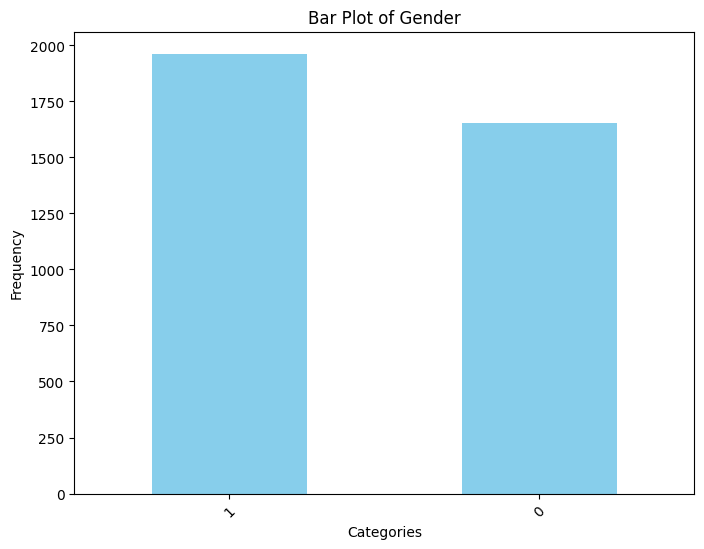

In [58]:
data = churn[churn['Balance'] == 0]
plt.figure(figsize = (8,6))
data['Gender'].value_counts().plot(kind = 'bar' , color = 'skyblue')
plt.title('Bar Plot of Gender')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<h3>4. Age</h3>

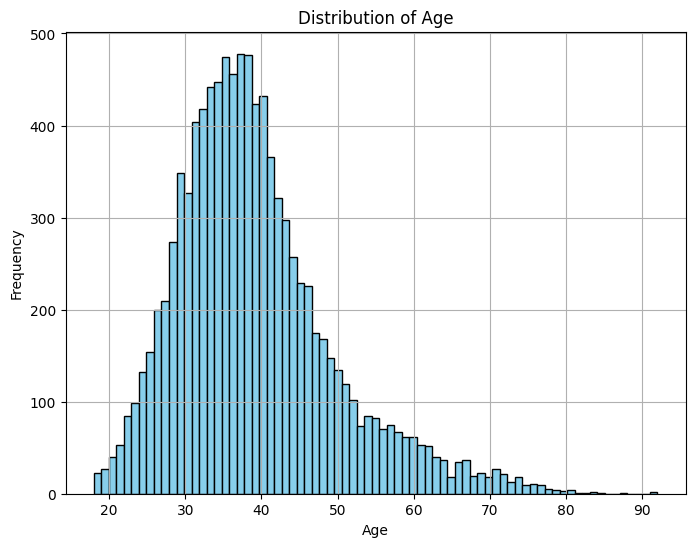

In [59]:
plt.figure(figsize=(8,6))
plt.hist(churn['Age'], bins = 75, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

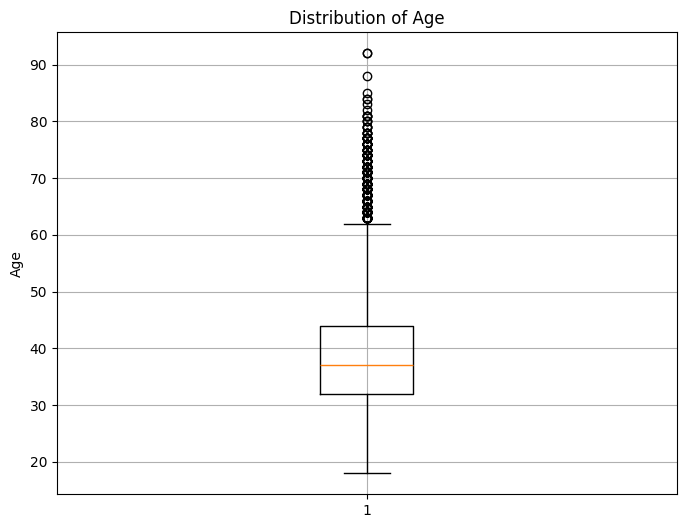

In [60]:
plt.figure(figsize = (8,6))
plt.boxplot(churn['Age'])
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [61]:
churn[churn['Age'] > churn['Age'].quantile(0.75) + 1.5*(churn['Age'].quantile(0.75) - churn['Age'].quantile(0.25))].value_counts().sum()

np.int64(359)

<h3>5. Tenure</h3>

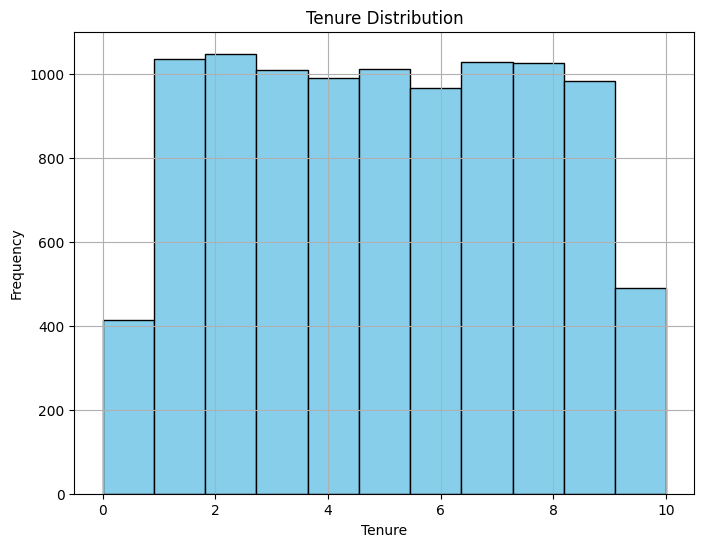

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(churn['Tenure'], bins=11, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h3>6. Balance</h3>

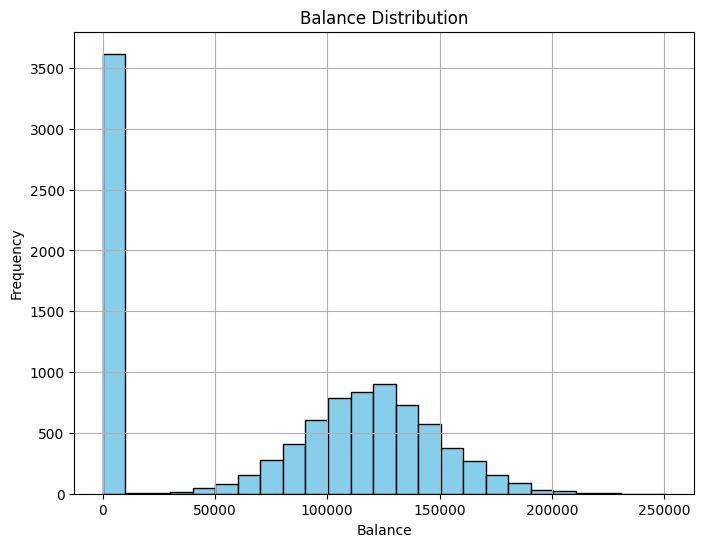

In [63]:
plt.figure(figsize=(8, 6))
plt.hist(churn['Balance'], bins=25, color='skyblue', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [64]:
(churn[churn['Balance'] == 0].value_counts().sum()  / len(churn) ) * 100

np.float64(36.17)

Count of Customers Having Zero Balance is very high, >3600, which is almost over 36% of the total customers.

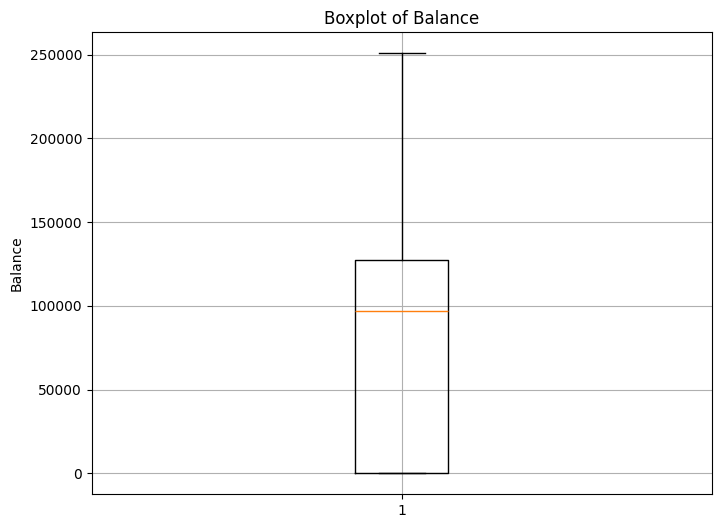

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot(churn['Balance'])
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

Removing the entries having zero balance

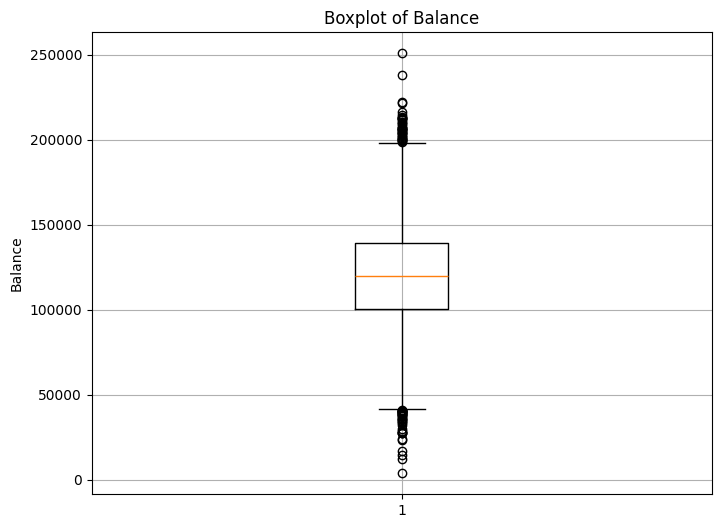

In [66]:
data = churn[churn['Balance'] != 0]
plt.figure(figsize=(8, 6))
plt.boxplot(data['Balance'])
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

In [67]:
data[(data['Balance'] > data['Balance'].quantile(0.75) + 1.5*(data['Balance'].quantile(0.75) - data['Balance'].quantile(0.25))) | (data['Balance'] < data['Balance'].quantile(0.25) - 1.5*(data['Balance'].quantile(0.75) - data['Balance'].quantile(0.25)))].value_counts().sum()

np.int64(73)

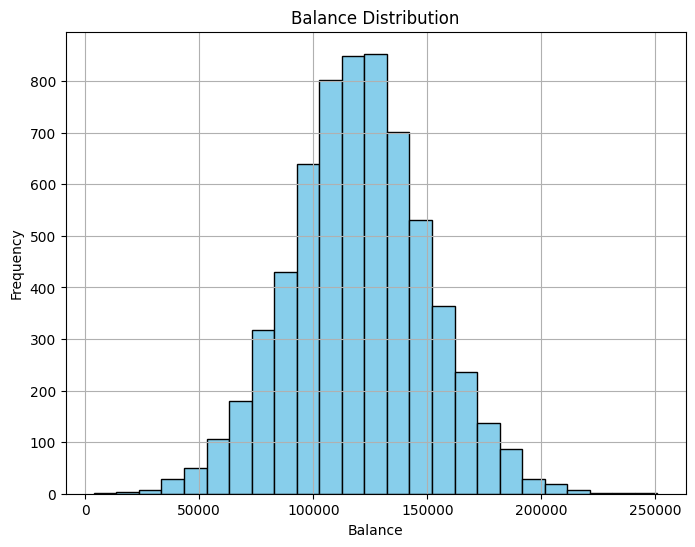

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(data['Balance'], bins=25, color='skyblue', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h3>7. Number of products</h3>

In [69]:
churn['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


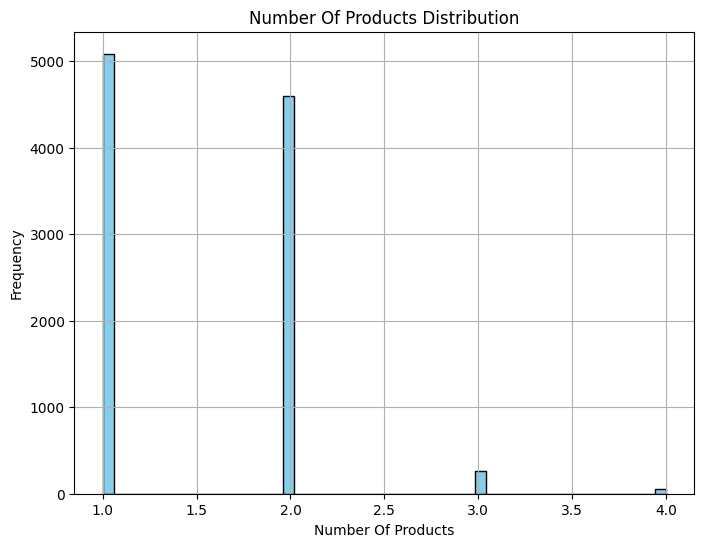

In [117]:
plt.figure(figsize=(8, 6))
plt.hist(churn['NumOfProducts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Number Of Products Distribution')
plt.xlabel('Number Of Products')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

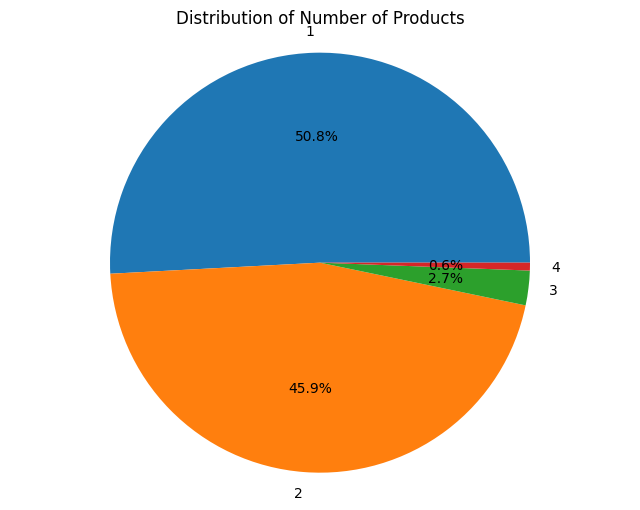

In [71]:
product_counts = churn['NumOfProducts'].value_counts()

labels = product_counts.index
sizes = product_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Number of Products')
plt.axis('equal')
plt.show()

<h3>8. Having credit card or not </h3>

In [72]:
churn['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


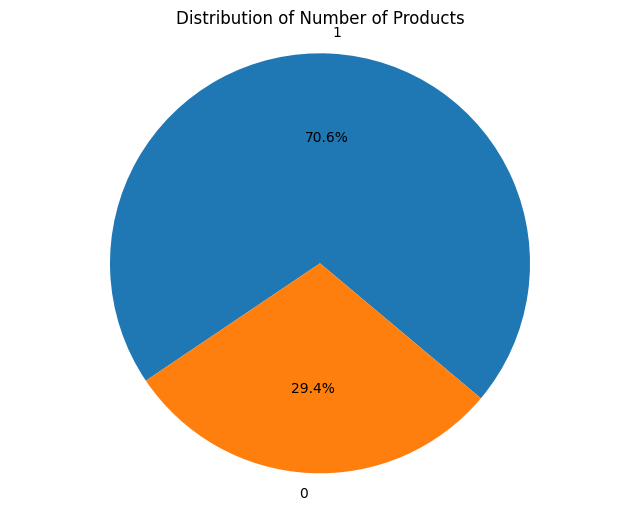

In [73]:
CrCardCount = churn['HasCrCard'].value_counts()

labels = CrCardCount.index
sizes = CrCardCount.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=320)
plt.title('Distribution of Number of Products')
plt.axis('equal')
plt.show()

In [74]:
de= churn[(churn["HasCrCard"]==1) & (churn["Exited"] ==1)]
defaulter = de["HasCrCard"].value_counts()

print( de["HasCrCard"].value_counts())

HasCrCard
1    1424
Name: count, dtype: int64


<h3>9. Is active member</h3>

In [75]:
churn['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


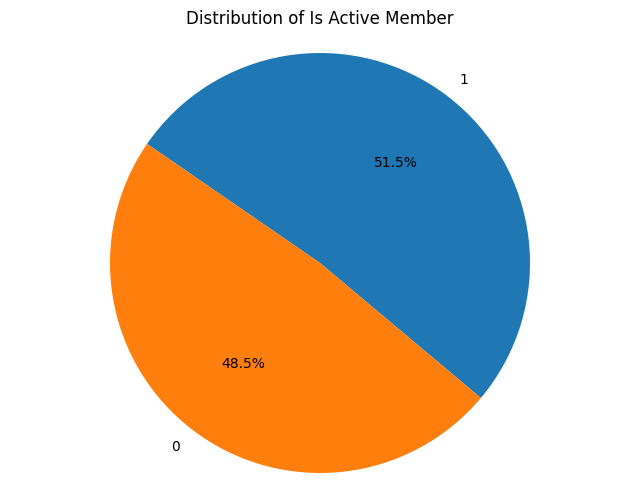

In [76]:
CrCardCount = churn['IsActiveMember'].value_counts()

labels = CrCardCount.index
sizes = CrCardCount.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=320)
plt.title('Distribution of Is Active Member')
plt.axis('equal')
plt.show()

In [77]:
print(churn[(churn['IsActiveMember'] == 0) & (churn['Exited'] == 1)].value_counts().sum())
print(churn[(churn['IsActiveMember'] == 1) & (churn['Exited'] == 1)].value_counts().sum())

1302
735


<h3>10. Estimated Salary</h3>

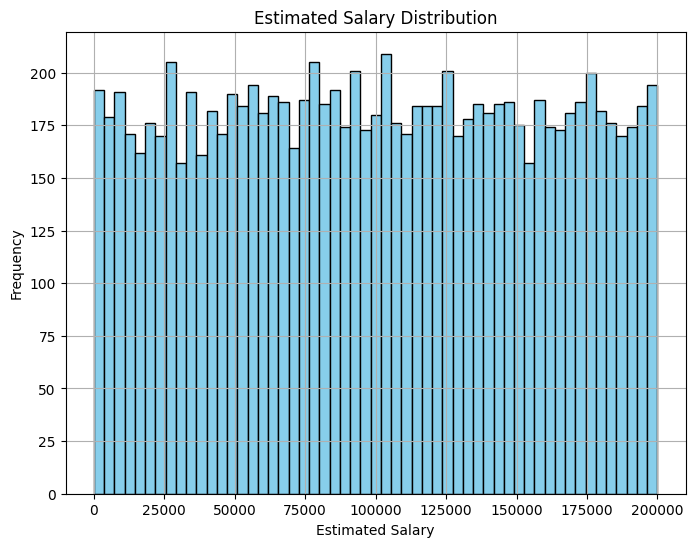

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(churn['EstimatedSalary'], bins=55, color='skyblue', edgecolor='black')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

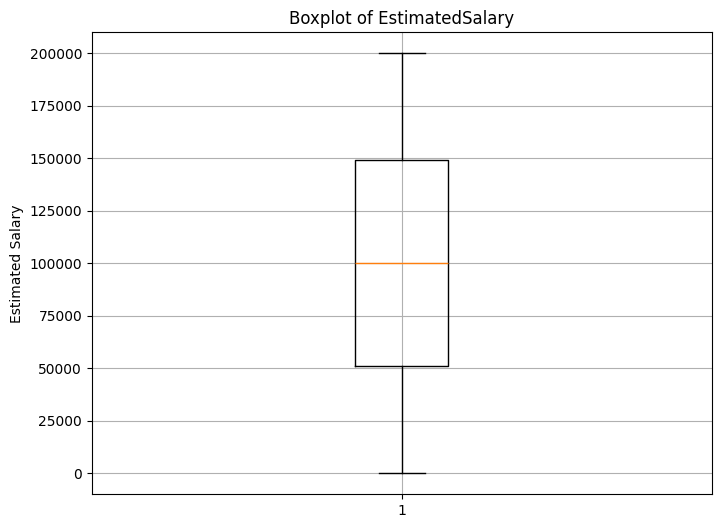

In [79]:
plt.figure(figsize=(8, 6))
plt.boxplot(churn['EstimatedSalary'])
plt.title('Boxplot of EstimatedSalary')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

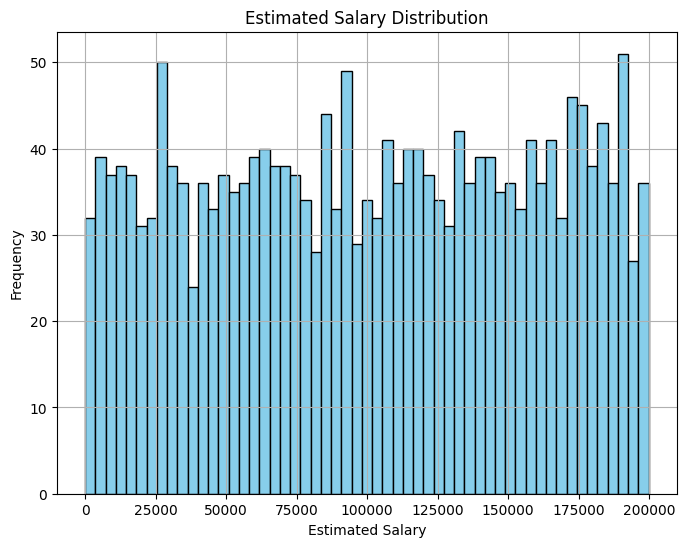

In [80]:
dta = churn[churn['Exited'] == 1]

plt.figure(figsize=(8, 6))
plt.hist(dta['EstimatedSalary'], bins=55, color='skyblue', edgecolor='black')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h3>11. Exited or not</h3>

In [81]:
churn['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


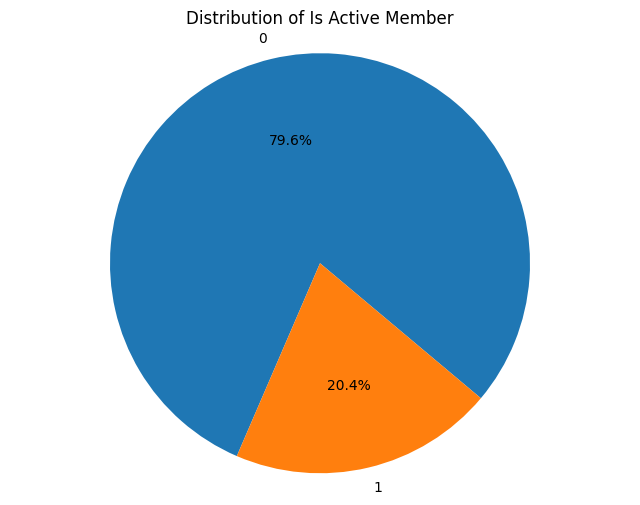

In [82]:
exited_count = churn['Exited'].value_counts()

labels = exited_count.index
sizes = exited_count.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=320)
plt.title('Distribution of Is Active Member')
plt.axis('equal')
plt.show()

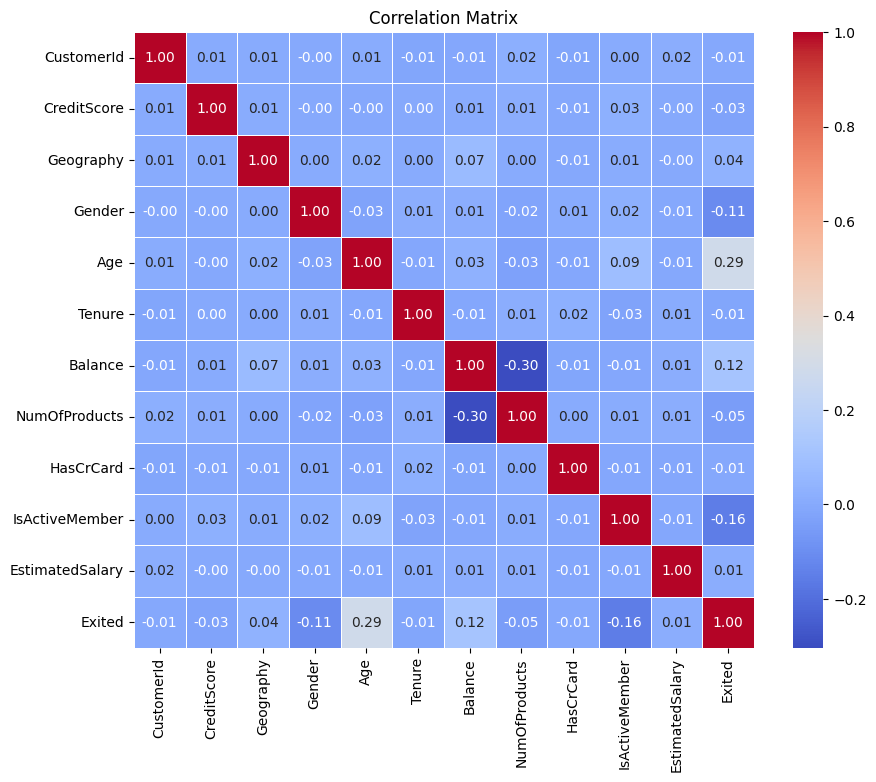

In [83]:
corr_matrix = churn.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h2>Model Training: Random Forest</h2>

In [121]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [119]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop(columns=['Exited','CustomerId']), churn['Exited'], test_size=0.2, random_state=42)

In [279]:
rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)

model = rf_model.fit(X_train,y_train)
y_pred_pro = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_pro > 0.25).astype(int)
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 80.40%


In [280]:
#Extracting the top 6 features

importance_rf = model.feature_importances_
features_rf = pd.Series(importance_rf, index=X_train.columns)
top_6 = features_rf.sort_values(ascending=False).head(6)
print("Top 6 features influencing churn (Exited):")
print(top_6)

Top 6 features influencing churn (Exited):
Age                0.240453
EstimatedSalary    0.148004
CreditScore        0.142369
Balance            0.138670
NumOfProducts      0.132061
Tenure             0.080932
dtype: float64


<h2>Evaluating the model</h2>

In [281]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix\n{}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report\n{} ".format(classification_report(y_test, y_pred)))

Confusion Matrix
[[1318  289]
 [ 103  290]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1607
           1       0.50      0.74      0.60       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.82      2000
 


<h2>Modifying the model: <span style="font-size: 0.5rem;">Outlier removal from Age column</span></h2><h4>1.</h4>


In [234]:
df2 = churn[churn['Age'] <= churn['Age'].quantile(0.75) + 1.5*(churn['Age'].quantile(0.75) - churn['Age'].quantile(0.25))]
df2.value_counts().sum()

np.int64(9641)

In [235]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df2.drop(columns=['Exited','CustomerId']), df2['Exited'], test_size=0.2, random_state=42)

In [274]:
model_new = rf_model.fit(X_train_new,y_train_new)
y_pred_new_prob = model_new.predict_proba(X_test_new)[:,1]
y_pred_new = (y_pred_new_prob > 0.21).astype(int)
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test_new,y_pred_new)*100))

Accuracy Score: 77.03%


In [275]:
print("Confusion Matrix\n{}".format(confusion_matrix(y_test_new, y_pred_new)))
print("Classification Report\n{} ".format(classification_report(y_test_new, y_pred_new)))

Confusion Matrix
[[1185  338]
 [ 105  301]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1523
           1       0.47      0.74      0.58       406

    accuracy                           0.77      1929
   macro avg       0.69      0.76      0.71      1929
weighted avg       0.82      0.77      0.79      1929
 


<h4>2.</h4>

In [238]:
from scipy.stats import zscore

z_scores = zscore(churn['Age'])
abs_z_scores = abs(z_scores)

churn_z = churn[abs_z_scores < 3]
print(f"After removing outliers: {len(churn_z)}")

After removing outliers: 9867


In [239]:
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(churn_z.drop(columns=['Exited','CustomerId']), churn_z['Exited'], test_size=0.2, random_state=42)

In [261]:
from sklearn.metrics import precision_recall_curve

model_z = rf_model.fit(X_train_z,y_train_z)
y_pred_z_prob = model_z.predict_proba(X_test_z)[:,1]
y_pred_z = (y_pred_z_prob > 0.25).astype(int)
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test_z,y_pred_z)*100))

Accuracy Score: 81.76%


In [262]:
print("Confusion Matrix\n{}".format(confusion_matrix(y_test_z, y_pred_z)))
print("Classification Report\n{} ".format(classification_report(y_test_z, y_pred_z)))

Confusion Matrix
[[1317  258]
 [ 102  297]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1575
           1       0.54      0.74      0.62       399

    accuracy                           0.82      1974
   macro avg       0.73      0.79      0.75      1974
weighted avg       0.85      0.82      0.83      1974
 


<h2>Model Training: XGBOOST</h2>

In [271]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 5,learning_rate = 0.15,random_state=42, n_jobs=-1)

model_xgb = xgb_model.fit(X_train,y_train)
y_pred_probxgb = model_xgb.predict_proba(X_test)[:,1]
y_pred_xgb = (y_pred_probxgb > 0.21).astype(int)
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred_xgb)*100))

Accuracy Score: 79.95%


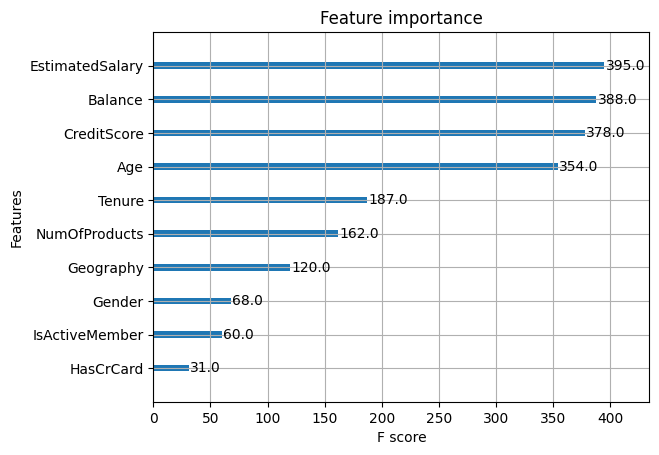

In [272]:
#Finding the importance of the features

from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

<h2>Evaluating the model</h2>

In [273]:
print("Confusion Matrix\n{}".format(confusion_matrix(y_test, y_pred_xgb)))
print("Classification Report\n{} ".format(classification_report(y_test, y_pred_xgb)))

Confusion Matrix
[[1304  303]
 [  98  295]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1607
           1       0.49      0.75      0.60       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000
 


<h2>Modifying the model: <span style="font-size: 0.5rem;">Outlier removal from Age column</span></h2>


In [269]:
model_z_xgb = xgb_model.fit(X_train_z,y_train_z)
y_pred_z_probxgb = model_z_xgb.predict_proba(X_test_z)[:,1]
y_pred_z_xgb = (y_pred_z_probxgb > 0.21).astype(int)
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test_z,y_pred_z_xgb)*100))


Accuracy Score: 80.90%


In [270]:
print("Confusion Matrix\n{}".format(confusion_matrix(y_test_z, y_pred_z_xgb)))
print("Classification Report\n{} ".format(classification_report(y_test_z, y_pred_z_xgb)))

Confusion Matrix
[[1295  280]
 [  97  302]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1575
           1       0.52      0.76      0.62       399

    accuracy                           0.81      1974
   macro avg       0.72      0.79      0.74      1974
weighted avg       0.85      0.81      0.82      1974
 


In [286]:
from IPython.display import display, HTML
display(HTML('<h1 style="color:green;">Best Model: XGBOOST with accuracy of 80.90% and recall of 76%</h1>'))


<h2>Deploying the model</h2>

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

In [342]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            le = self.encoders.get(col)
            if le:
                X[col] = le.transform(X[col])
        return X

In [343]:
from scipy.stats import zscore

z_scores_deploy = zscore(deploy['Age'])
abs_z_scores_deploy = abs(z_scores_deploy)

churn_deploy = deploy[abs_z_scores_deploy < 3]

In [344]:
categorical_cols = ['Gender', 'Geography']
numerical_cols = ['Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'CreditScore', 'IsActiveMember','HasCrCard']

pipeline = Pipeline(steps=[
    ('label_encoder', MultiColumnLabelEncoder(columns=categorical_cols)),
    ('classifier', XGBClassifier(max_depth = 5,learning_rate = 0.15,random_state=42, n_jobs=-1))
])

In [345]:
with open('churn_prediction.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [340]:
X_train_deploy, X_test_deploy, y_train_deploy, y_test_deploy = train_test_split(churn_deploy.drop(columns=['Exited','CustomerId']), churn_deploy['Exited'], test_size=0.2, random_state=42)

pipeline.fit(X_train_deploy,y_train_deploy)

# Predict and evaluate
y_pred_dep_prob = pipeline.predict_proba(X_test_deploy)[:,1]
y_pred_dep = (y_pred_dep_prob > 0.21).astype(int)


0.809017223910841
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1575
           1       0.52      0.76      0.62       399

    accuracy                           0.81      1974
   macro avg       0.72      0.79      0.74      1974
weighted avg       0.85      0.81      0.82      1974

